<a href="https://colab.research.google.com/github/EnsiyehRaoufi/Claims-Knowledge-Graph/blob/main/claimskg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [ ]:
!pip install numpy --upgrade
!pip install autogluon --no-cache-dir

     |████████████████████████████████| 15.7 MB 13.9 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 56 kB 16.8 MB/s 
     |████████████████████████████████| 52 kB 18.2 MB/s 
     |████████████████████████████████| 273 kB 51.1 MB/s 
     |████████████████████████████████| 352 kB 42.0 MB/s 
     |████████████████████████████████| 210 kB 50.1 MB/s 
     |████████████████████████████████| 27.4 MB 1.3 MB/s 
     |████████████████████████████████| 132 kB 49.6 MB/s 
     |████████████████████████████████| 4.2 MB 46.5 MB/s 
     |████████████████████████████████| 22.3 MB 1.2 MB/s 
     |████████████████████████████████| 837 kB 62.3 MB/s 
     |████████████████████████████████| 1.3 MB 50.4 MB/s 
     |████████████████████████████████| 119 kB 52.6 MB/s 
     |████████████████████████████████| 3.0 MB 42.3 MB/s 
     |████████████████████████████████| 296 kB 66.2 MB/s 
     |████████████████████████████████| 67.3 MB 1.4 MB/s 
     |████████████████████████████████| 166.7 MB 1.3 MB/s 
     |████████████████████████████████| 189 kB 66.4 MB/s 
     |█████████

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [ ]:
%cd MyDrive/MyDrive/AWS_Capstone

/content/MyDrive/MyDrive/AWS_Capstone


In [ ]:
pwd

'/content/MyDrive/MyDrive/AWS_Capstone'

In [ ]:
ls

my_starbuck.csv       profile.csv         transaction_models/
portfolio_edited.csv  profile_edited.csv  transcript_edited.csv
portfolio.json        profile.json        transcript.json


In [ ]:
import pandas as pd
import numpy as np
import math
import json
import datetime
% matplotlib inline


# Reading and cleansing data

In [ ]:
# read in the json files
transcript = pd.read_json('transcript.json', orient='records', lines=True)

In [ ]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)

In [ ]:
profile = pd.read_json('profile.json', orient='records', lines=True, )
profile.to_csv('profile.csv', index=False)
profile = pd.read_csv('profile.csv', parse_dates=['became_member_on'])

In [ ]:
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [ ]:
transcript_value = pd.json_normalize(transcript['value'])
transcript_value

,offer id,amount,offer_id,reward
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN
...,...,...,...,...
306529,NaN,1.59,NaN,NaN
306530,NaN,9.53,NaN,NaN
306531,NaN,3.61,NaN,NaN
306532,NaN,3.53,NaN,NaN


In [ ]:
transcript_value['offers'] = transcript_value['offer id'].fillna(transcript_value['offer_id'])
transcript_value

,offer id,amount,offer_id,reward,offers
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5,NaN,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...
306529,NaN,1.59,NaN,NaN,NaN
306530,NaN,9.53,NaN,NaN,NaN
306531,NaN,3.61,NaN,NaN,NaN
306532,NaN,3.53,NaN,NaN,NaN


In [ ]:
transcript_value = transcript_value.drop(['offer_id', 'offer id'], axis = 1)
transcript_value

,amount,reward,offers
0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...
306529,1.59,NaN,NaN
306530,9.53,NaN,NaN
306531,3.61,NaN,NaN
306532,3.53,NaN,NaN


In [ ]:
transcript = transcript.drop(['value'], axis = 1)
transcript

,person,event,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0
2,e2127556f4f64592b11af22de27a7932,offer received,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0
...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714
306531,a00058cf10334a308c68e7631c529907,transaction,714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714


In [ ]:
transcript = pd.concat([transcript, transcript_value], axis=1)
transcript

,person,event,time,amount,reward,offers
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,NaN


In [ ]:
for col in ['event', 'offers']:
    transcript[col] = transcript[col].astype('category')
transcript

,person,event,time,amount,reward,offers
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,NaN


In [ ]:
print(np.unique(transcript['event']))
transcript['offers'].unique()

['offer completed' 'offer received' 'offer viewed' 'transaction']


['9b98b8c7a33c4b65b9aebfe6a799e6d9', '0b1e1539f2cc45b7b9fa7c272da2e1d7', '2906b810c7d4411798c6938adc9daaa5', 'fafdcd668e3743c1bb461111dcafc2a4', '4d5c57ea9a6940dd891ad53e9dbe8da0', ..., '2298d6c36e964ae4a3e7e9706d1fb8c2', '3f207df678b143eea3cee63160fa8bed', 'ae264e3637204a6fb9bb56bc8210ddfd', '5a8bc65990b245e5a138643cd4eb9837', NaN]
Length: 11
Categories (10, object): ['0b1e1539f2cc45b7b9fa7c272da2e1d7', '2298d6c36e964ae4a3e7e9706d1fb8c2',
                          '2906b810c7d4411798c6938adc9daaa5', '3f207df678b143eea3cee63160fa8bed', ...,
                          '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'ae264e3637204a6fb9bb56bc8210ddfd',
                          'f19421c1d4aa40978ebb69ca19b0e20d', 'fafdcd668e3743c1bb461111dcafc2a4']

In [ ]:
for chan in ['offer_completed', 'offer_received', 'offer_viewed', 'transaction']:
  transcript[chan] = transcript.event.apply(lambda x: 1 if x==chan.replace('_',' ') else 0)
transcript.pop('event')

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,714,1.59,NaN,NaN,0,0,0,1
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,NaN,NaN,0,0,0,1
306531,a00058cf10334a308c68e7631c529907,714,3.61,NaN,NaN,0,0,0,1
306532,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,NaN,NaN,0,0,0,1


In [ ]:
transcript['amount'] = transcript['amount'].fillna(0)
transcript['reward'] = transcript['reward'].fillna(0)
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   person           306534 non-null  object  
 1   time             306534 non-null  int64   
 2   amount           306534 non-null  float64 
 3   reward           306534 non-null  float64 
 4   offers           167581 non-null  category
 5   offer_completed  306534 non-null  int64   
 6   offer_received   306534 non-null  int64   
 7   offer_viewed     306534 non-null  int64   
 8   transaction      306534 non-null  int64   
dtypes: category(1), float64(2), int64(5), object(1)
memory usage: 19.0+ MB


In [ ]:
transcript.to_csv("transcript_edited.csv",index=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc999b3f590>,
      dtype=object)

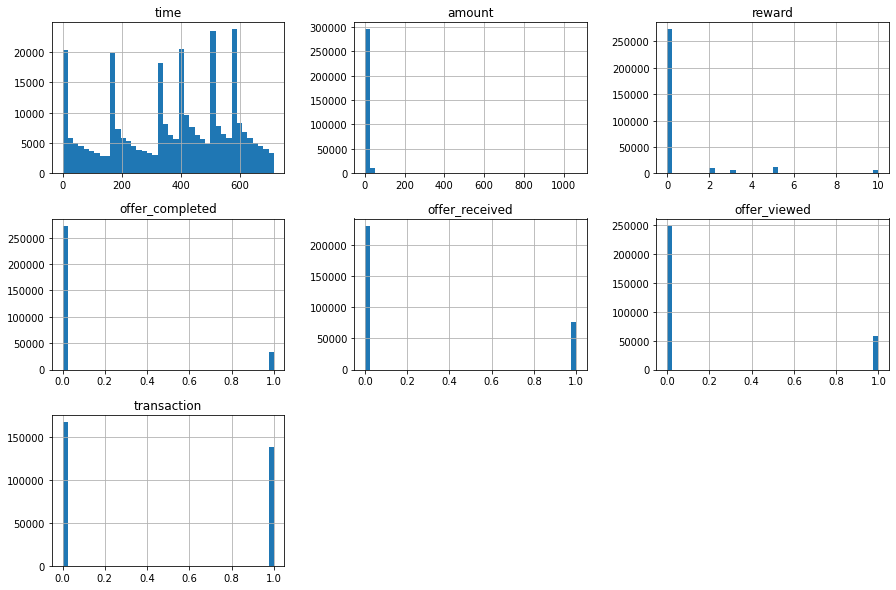

In [ ]:
transcript.hist(bins=40, figsize=(15, 10))

In [ ]:
portfolio = pd.read_json('portfolio.json', orient='records', lines=True)
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [ ]:
for chan in ['web', 'email', 'mobile', 'social']:
  portfolio[chan] = portfolio.channels.apply(lambda x: 1 if chan in x else 0)
portfolio.pop('channels')
portfolio

,reward,difficulty,duration,offer_type,id,web,email,mobile,social
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,1,0
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,1,0


In [ ]:
for chan in ['bogo', 'discount', 'informational']:
  portfolio[chan] = portfolio.offer_type.apply(lambda x: 1 if x==chan else 0)
portfolio.pop('offer_type')
portfolio

,reward,difficulty,duration,id,web,email,mobile,social,bogo,discount,informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0


In [ ]:
portfolio = portfolio.rename(columns={'reward': 'offer_reward', 'duration': 'offer_duration', 'difficulty': 'offer_difficulty'})

In [ ]:
portfolio

,offer_reward,offer_difficulty,offer_duration,id,web,email,mobile,social,bogo,discount,informational
0,10,10,7,ae264e3637204a6fb9bb56bc8210ddfd,0,1,1,1,1,0,0
1,10,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,3f207df678b143eea3cee63160fa8bed,1,1,1,0,0,0,1
3,5,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,1,0,1,0,0
4,5,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,1,0,0,0,1,0
5,3,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,5a8bc65990b245e5a138643cd4eb9837,0,1,1,1,0,0,1
8,5,5,5,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,2906b810c7d4411798c6938adc9daaa5,1,1,1,0,0,1,0


In [ ]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   offer_reward      10 non-null     int64 
 1   offer_difficulty  10 non-null     int64 
 2   offer_duration    10 non-null     int64 
 3   id                10 non-null     object
 4   web               10 non-null     int64 
 5   email             10 non-null     int64 
 6   mobile            10 non-null     int64 
 7   social            10 non-null     int64 
 8   bogo              10 non-null     int64 
 9   discount          10 non-null     int64 
 10  informational     10 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1008.0+ bytes


In [ ]:
portfolio.to_csv("portfolio_edited.csv",index=False)

In [ ]:
#person_viewed_offer = transcript['person'][transcript['event']=='offer viewed']
#len(person_viewed_offer)

In [ ]:
#person_viewed_offer

In [ ]:
#person_viewed_offer_2 = person_viewed_offer.drop_duplicates()
#len(person_viewed_offer_2)

In [ ]:
#viewed_transcript = transcript[transcript['person'].isin(list(person_viewed_offer))]

In [ ]:
#len(viewed_transcript)

In [ ]:
#viewed_transcript

In [ ]:
#person_viewed_completed_offer = viewed_transcript['person'][viewed_transcript['event']=='offer completed']
#len(person_viewed_completed_offer)

In [ ]:
#person_viewed_offer_2 = person_viewed_completed_offer.drop_duplicates()
#len(person_viewed_offer_2)

In [ ]:
#viewed_completed_transcript = viewed_transcript[viewed_transcript['person'].isin(list(person_viewed_completed_offer))]

In [ ]:
#these 254027 persons are people who viewed and completed at least an offer. They are our goal group
#len(viewed_completed_transcript)

In [ ]:
#viewed_completed_transcript

In [ ]:
profile = pd.read_csv('profile.csv', parse_dates=['became_member_on'])
profile['year'] = profile['became_member_on'].dt.year
profile['month'] = profile['became_member_on'].dt.month
profile

,gender,age,id,became_member_on,income,year,month
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,2017,2
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,2017,7
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,2018,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,5
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,8
...,...,...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,54000.0,2018,6
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,72000.0,2018,7
16997,M,49,01d26f638c274aa0b965d24cefe3183f,2017-01-26,73000.0,2017,1
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,50000.0,2016,3


In [ ]:
profile[profile['gender']=='O'].count()

gender              212
age                 212
id                  212
became_member_on    212
income              212
dtype: int64

In [ ]:
this_year = datetime.datetime.today().year
this_month = datetime.datetime.today().month
this_year, this_month

(2022, 2)

In [ ]:
#creating the column 'membership_duration' that contains membership duration in month
profile['membership_duration'] = (this_year-profile['year'])*12 + (12-profile['month']+this_month)
for col in ['became_member_on', 'year', 'month']:
  profile.pop(col)
profile

,gender,age,id,income,membership_duration
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,NaN,72
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,67
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,NaN,55
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,69
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,NaN,66
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,56
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,55
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,73
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,83


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               14825 non-null  object 
 1   age                  17000 non-null  int64  
 2   id                   17000 non-null  object 
 3   income               14825 non-null  float64
 4   membership_duration  17000 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [ ]:
mean_age = profile['age'][profile['age']!=118].mean()
mean_age = int(mean_age)
mean_age

54

In [ ]:
#fill the NaN cells of the age column with average age
profile.loc[profile.age == 118, 'age'] = mean_age
profile['age']

0        54
1        55
2        54
3        75
4        54
         ..
16995    45
16996    61
16997    49
16998    83
16999    62
Name: age, Length: 17000, dtype: int64

In [ ]:
#fill the NaN cells of the income column with the average income
mean_income = round(np.mean(profile['income']),0)
profile['income'] = profile['income'].fillna(mean_income)

In [ ]:
O_count = profile[profile['gender']=='O']['gender'].count()
print(f"There are {O_count} persons having non obvious gender")

There are 212 persons having non obvious gender


In [ ]:
#fill the NaN cells of gender column in random, we don't consider non obvious genders for random choicing because of their minority
import random

num_na = profile['gender'].isna().sum()  # number of missing cases
profile.loc[profile['gender'].isna(), 'gender'] = random.choices(["M", "F"], k=num_na)

In [ ]:
profile["gender"] = profile["gender"].astype("category")

In [ ]:
profile

,gender,age,id,income,membership_duration
0,M,54,68be06ca386d4c31939f3a4f0e3dd783,65405.0,72
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,67
2,M,54,38fe809add3b4fcf9315a9694bb96ff5,65405.0,55
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,69
4,F,54,a03223e636434f42ac4c3df47e8bac43,65405.0,66
...,...,...,...,...,...
16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,56
16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,55
16997,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,73
16998,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,83


In [ ]:
profile.gender.unique()

['M', 'F', 'O']
Categories (3, object): ['F', 'M', 'O']

In [ ]:
for chan in ['M', 'F', 'O']:
  profile[chan] = profile.gender.apply(lambda x: 1 if x==chan else 0)
profile.pop('gender')
profile

,age,id,income,membership_duration,M,F,O
0,54,68be06ca386d4c31939f3a4f0e3dd783,65405.0,72,1,0,0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,67,0,1,0
2,54,38fe809add3b4fcf9315a9694bb96ff5,65405.0,55,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,69,0,1,0
4,54,a03223e636434f42ac4c3df47e8bac43,65405.0,66,0,1,0
...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,56,0,1,0
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,55,1,0,0
16997,49,01d26f638c274aa0b965d24cefe3183f,73000.0,73,1,0,0
16998,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,83,0,1,0


In [ ]:
profile = profile.rename(columns={'F': 'Female', 'M': 'Male', 'O': 'Other'})
profile

,age,id,income,membership_duration,Male,Female,Other
0,54,68be06ca386d4c31939f3a4f0e3dd783,65405.0,72,1,0,0
1,55,0610b486422d4921ae7d2bf64640c50b,112000.0,67,0,1,0
2,54,38fe809add3b4fcf9315a9694bb96ff5,65405.0,55,1,0,0
3,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,69,0,1,0
4,54,a03223e636434f42ac4c3df47e8bac43,65405.0,66,0,1,0
...,...,...,...,...,...,...,...
16995,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,56,0,1,0
16996,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,55,1,0,0
16997,49,01d26f638c274aa0b965d24cefe3183f,73000.0,73,1,0,0
16998,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,83,0,1,0


In [ ]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  17000 non-null  int64  
 1   id                   17000 non-null  object 
 2   income               17000 non-null  float64
 3   membership_duration  17000 non-null  int64  
 4   Male                 17000 non-null  int64  
 5   Female               17000 non-null  int64  
 6   Other                17000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 929.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc999ac5b50>,
      dtype=object)

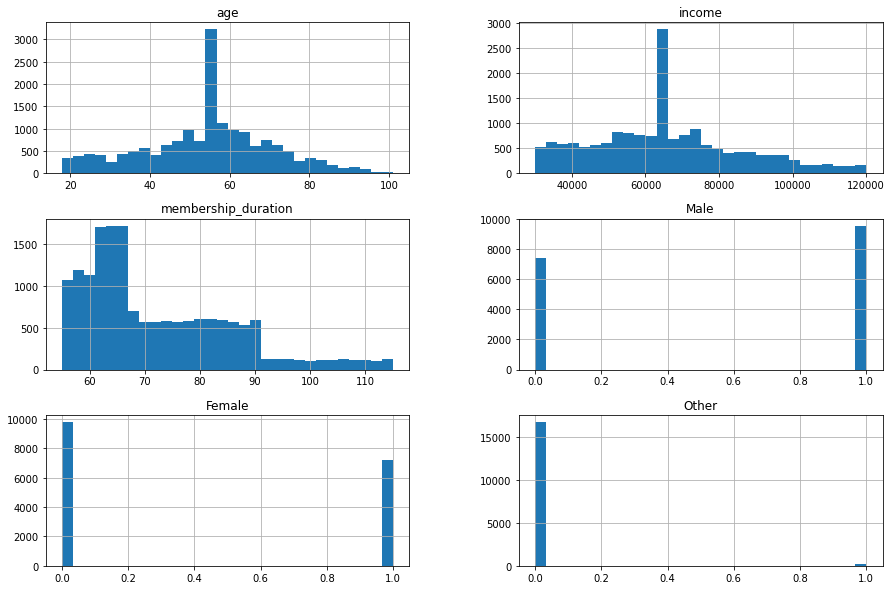

In [ ]:
profile.hist(bins=30, figsize=(15, 10))

In [ ]:
profile.to_csv("profile_edited.csv", index=False)

# Toggling Data

In [ ]:
transcript = pd.read_csv("transcript_edited.csv")
portfolio = pd.read_csv("portfolio_edited.csv")
profile = pd.read_csv("profile_edited.csv")

In [ ]:
transcript_profile_merged = pd.merge(transcript, profile, left_on='person', right_on='id', how='left').drop('id', axis=1)
transcript_profile_merged 

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other
0,78afa995795e4d85b5d9ceeca43f5fef,0,0.00,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,75,100000.0,69,0,1,0
1,a03223e636434f42ac4c3df47e8bac43,0,0.00,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,54,65405.0,66,0,1,0
2,e2127556f4f64592b11af22de27a7932,0,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,68,70000.0,58,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.00,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,54,65405.0,65,0,1,0
4,68617ca6246f4fbc85e91a2a49552598,0,0.00,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0,54,65405.0,64,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,714,1.59,0.0,NaN,0,0,0,1,66,47000.0,61,1,0,0
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,0.0,NaN,0,0,0,1,52,62000.0,58,1,0,0
306531,a00058cf10334a308c68e7631c529907,714,3.61,0.0,NaN,0,0,0,1,63,52000.0,113,0,1,0
306532,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,0.0,NaN,0,0,0,1,57,40000.0,79,1,0,0


In [ ]:
my_starbuck = pd.merge(transcript_profile_merged, portfolio, left_on='offers', right_on='id', how='left').drop('id', axis=1)
my_starbuck 

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational
0,78afa995795e4d85b5d9ceeca43f5fef,0,0.00,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,75,100000.0,69,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,a03223e636434f42ac4c3df47e8bac43,0,0.00,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,54,65405.0,66,0,1,0,5.0,20.0,10.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,e2127556f4f64592b11af22de27a7932,0,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,68,70000.0,58,1,0,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.00,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,54,65405.0,65,0,1,0,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,68617ca6246f4fbc85e91a2a49552598,0,0.00,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0,54,65405.0,64,0,1,0,10.0,10.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,714,1.59,0.0,NaN,0,0,0,1,66,47000.0,61,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,0.0,NaN,0,0,0,1,52,62000.0,58,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,714,3.61,0.0,NaN,0,0,0,1,63,52000.0,113,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,0.0,NaN,0,0,0,1,57,40000.0,79,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_transcript = ((my_starbuck['amount']).groupby(my_starbuck['person'])).sum()
total_transcript_df = pd.DataFrame({'id':total_transcript.index, 'total_transaction':total_transcript.values})
my_starbuck = pd.merge(my_starbuck, total_transcript_df, left_on='person', right_on='id', how='left').drop('id', axis=1)
my_starbuck

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,0.00,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,0,75,100000.0,69,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,159.27
1,a03223e636434f42ac4c3df47e8bac43,0,0.00,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,1,0,0,54,65405.0,66,0,1,0,5.0,20.0,10.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,4.65
2,e2127556f4f64592b11af22de27a7932,0,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,68,70000.0,58,1,0,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,57.73
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0.00,0.0,fafdcd668e3743c1bb461111dcafc2a4,0,1,0,0,54,65405.0,65,0,1,0,2.0,10.0,10.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.00
4,68617ca6246f4fbc85e91a2a49552598,0,0.00,0.0,4d5c57ea9a6940dd891ad53e9dbe8da0,0,1,0,0,54,65405.0,64,0,1,0,10.0,10.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,714,1.59,0.0,NaN,0,0,0,1,66,47000.0,61,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.00
306530,68213b08d99a4ae1b0dcb72aebd9aa35,714,9.53,0.0,NaN,0,0,0,1,52,62000.0,58,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.01
306531,a00058cf10334a308c68e7631c529907,714,3.61,0.0,NaN,0,0,0,1,63,52000.0,113,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.05
306532,76ddbd6576844afe811f1a3c0fbb5bec,714,3.53,0.0,NaN,0,0,0,1,57,40000.0,79,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.62


In [ ]:
my_starbuck = my_starbuck.sort_values(['person','time',])
my_starbuck

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
55972,0009655768c64bdeb2e877511632db8f,168,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
77705,0009655768c64bdeb2e877511632db8f,192,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
89291,0009655768c64bdeb2e877511632db8f,228,22.16,0.0,NaN,0,0,0,1,33,72000.0,70,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.60
113605,0009655768c64bdeb2e877511632db8f,336,0.00,0.0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
139992,0009655768c64bdeb2e877511632db8f,372,0.00,0.0,3f207df678b143eea3cee63160fa8bed,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258361,ffff82501cea40309d5fdd7edcca4a07,576,14.23,0.0,NaN,0,0,0,1,45,62000.0,75,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.07
258362,ffff82501cea40309d5fdd7edcca4a07,576,0.00,2.0,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
262475,ffff82501cea40309d5fdd7edcca4a07,582,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,0,1,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
274809,ffff82501cea40309d5fdd7edcca4a07,606,10.12,0.0,NaN,0,0,0,1,45,62000.0,75,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.07


In [ ]:
my_starbuck['cumsum'] = (my_starbuck['amount']).groupby(my_starbuck['person']).cumsum()
my_starbuck[['person', 'amount', 'time','cumsum']]
my_starbuck

,person,time,amount,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction,cumsum
55972,0009655768c64bdeb2e877511632db8f,168,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60,0.00
77705,0009655768c64bdeb2e877511632db8f,192,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60,0.00
89291,0009655768c64bdeb2e877511632db8f,228,22.16,0.0,NaN,0,0,0,1,33,72000.0,70,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.60,22.16
113605,0009655768c64bdeb2e877511632db8f,336,0.00,0.0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60,22.16
139992,0009655768c64bdeb2e877511632db8f,372,0.00,0.0,3f207df678b143eea3cee63160fa8bed,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60,22.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258361,ffff82501cea40309d5fdd7edcca4a07,576,14.23,0.0,NaN,0,0,0,1,45,62000.0,75,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.07,197.04
258362,ffff82501cea40309d5fdd7edcca4a07,576,0.00,2.0,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07,197.04
262475,ffff82501cea40309d5fdd7edcca4a07,582,0.00,0.0,2906b810c7d4411798c6938adc9daaa5,0,0,1,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07,197.04
274809,ffff82501cea40309d5fdd7edcca4a07,606,10.12,0.0,NaN,0,0,0,1,45,62000.0,75,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,226.07,207.16


In [ ]:
my_starbuck = my_starbuck[my_starbuck['transaction']==0]
my_starbuck['amount'] = my_starbuck['cumsum']
my_starbuck.pop('cumsum')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


55972       0.00
77705       0.00
113605     22.16
139992     22.16
153401     22.16
           ...  
214717    182.81
230690    182.81
246495    182.81
258362    197.04
262475    197.04
Name: cumsum, Length: 167581, dtype: float64

In [ ]:
my_starbuck.reset_index(drop=True, inplace=True)

In [ ]:
my_starbuck = my_starbuck.rename(columns={'amount':'cumulative_transaction'})
my_starbuck['time'] /= 24.0
my_starbuck['time'] = np.ceil(my_starbuck['time'])
my_starbuck

,person,time,cumulative_transaction,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,0009655768c64bdeb2e877511632db8f,7.0,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
1,0009655768c64bdeb2e877511632db8f,8.0,0.00,0.0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
2,0009655768c64bdeb2e877511632db8f,14.0,22.16,0.0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
3,0009655768c64bdeb2e877511632db8f,16.0,22.16,0.0,3f207df678b143eea3cee63160fa8bed,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
4,0009655768c64bdeb2e877511632db8f,17.0,22.16,0.0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,33,72000.0,70,1,0,0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,ffff82501cea40309d5fdd7edcca4a07,21.0,182.81,5.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167577,ffff82501cea40309d5fdd7edcca4a07,23.0,182.81,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167578,ffff82501cea40309d5fdd7edcca4a07,24.0,182.81,0.0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
167579,ffff82501cea40309d5fdd7edcca4a07,24.0,197.04,2.0,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07


In [ ]:
#changing non zero entries of the reward column to 1, to remove dependendy of it with column offer_reward
my_starbuck['reward'] = my_starbuck.reward.apply(lambda x: 1 if x!=0 else 0)
my_starbuck

,person,time,cumulative_transaction,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,0009655768c64bdeb2e877511632db8f,7.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
1,0009655768c64bdeb2e877511632db8f,8.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
2,0009655768c64bdeb2e877511632db8f,14.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
3,0009655768c64bdeb2e877511632db8f,16.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
4,0009655768c64bdeb2e877511632db8f,17.0,22.16,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,33,72000.0,70,1,0,0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,ffff82501cea40309d5fdd7edcca4a07,21.0,182.81,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167577,ffff82501cea40309d5fdd7edcca4a07,23.0,182.81,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167578,ffff82501cea40309d5fdd7edcca4a07,24.0,182.81,0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
167579,ffff82501cea40309d5fdd7edcca4a07,24.0,197.04,1,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07


In [ ]:
my_starbuck['offers'] = my_starbuck['offers'].astype('category')
my_starbuck.pop('transaction')
my_starbuck

,person,time,cumulative_transaction,reward,offers,offer_completed,offer_received,offer_viewed,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,0009655768c64bdeb2e877511632db8f,7.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
1,0009655768c64bdeb2e877511632db8f,8.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
2,0009655768c64bdeb2e877511632db8f,14.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
3,0009655768c64bdeb2e877511632db8f,16.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,0,1,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
4,0009655768c64bdeb2e877511632db8f,17.0,22.16,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,33,72000.0,70,1,0,0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,ffff82501cea40309d5fdd7edcca4a07,21.0,182.81,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167577,ffff82501cea40309d5fdd7edcca4a07,23.0,182.81,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167578,ffff82501cea40309d5fdd7edcca4a07,24.0,182.81,0,2906b810c7d4411798c6938adc9daaa5,0,1,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
167579,ffff82501cea40309d5fdd7edcca4a07,24.0,197.04,1,2906b810c7d4411798c6938adc9daaa5,1,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07


In [ ]:
my_starbuck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167581 entries, 0 to 167580
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   person                  167581 non-null  object  
 1   time                    167581 non-null  float64 
 2   cumulative_transaction  167581 non-null  float64 
 3   reward                  167581 non-null  int64   
 4   offers                  167581 non-null  category
 5   offer_completed         167581 non-null  int64   
 6   offer_received          167581 non-null  int64   
 7   offer_viewed            167581 non-null  int64   
 8   age                     167581 non-null  int64   
 9   income                  167581 non-null  float64 
 10  membership_duration     167581 non-null  int64   
 11  Male                    167581 non-null  int64   
 12  Female                  167581 non-null  int64   
 13  Other                   167581 non-null  int64   
 14  offe

In [ ]:
my_starbuck.to_csv("my_starbuck.csv", index=False)

# Data Analysis

In [ ]:
my_starbuck = pd.read_csv("my_starbuck.csv")

Histogram of all features


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8eacf2c50>,
      dtype=object)

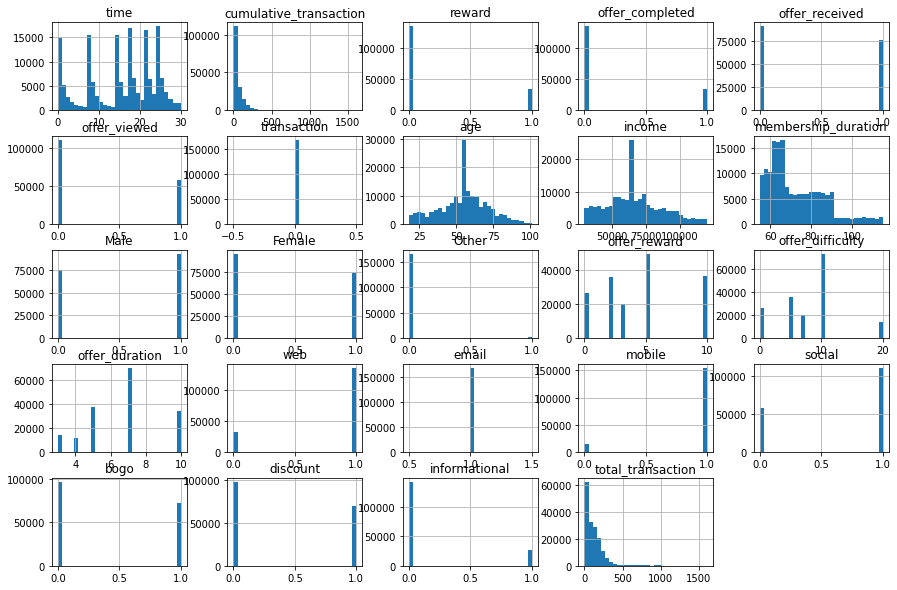

In [ ]:
print("Histogram of all features")
my_starbuck.hist(bins=30, figsize=(15, 10))

Histogram of female customer's completed rewards 


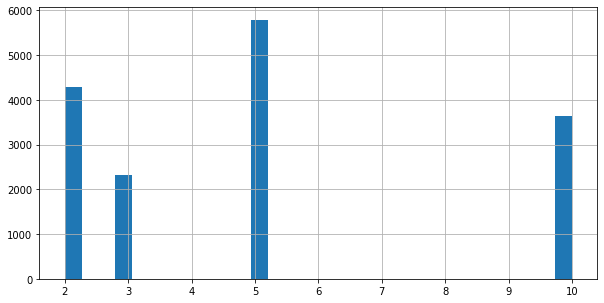

In [ ]:
print("Histogram of female customer's completed rewards ")
(my_starbuck[(my_starbuck['Female']==1) & (my_starbuck['reward']==1)]['offer_reward']).hist(bins=30, figsize=(10, 5))

Histogram of female customer's completed offer types 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e8fedfd0>,
      dtype=object)

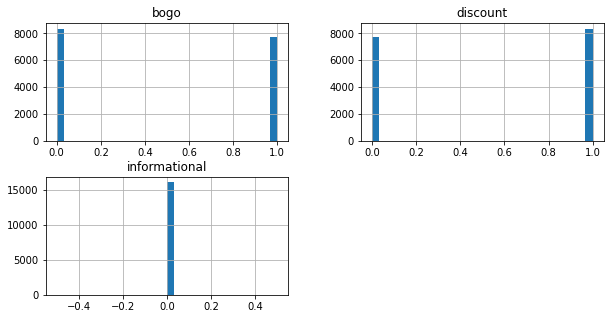

In [ ]:
print("Histogram of female customer's completed offer types ")
(my_starbuck[(my_starbuck['Female']==1) & (my_starbuck['reward']==1) ][['bogo',	'discount',	'informational']]).hist(bins=30, figsize=(10, 5))

Histogram of male customer's completed rewards 


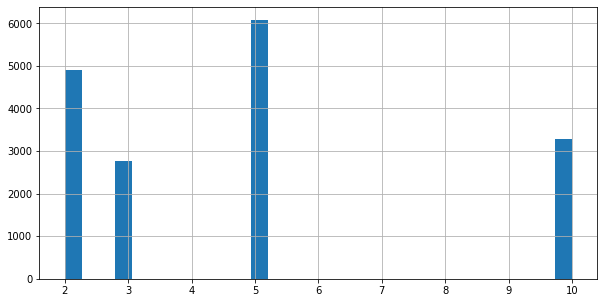

In [ ]:
print("Histogram of male customer's completed rewards ")
(my_starbuck[(my_starbuck['Male']==1) & (my_starbuck['reward']==1)]['offer_reward']).hist(bins=30, figsize=(10, 5))

Histogram of male customer's completed offer types 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8e8f6ce50>,
      dtype=object)

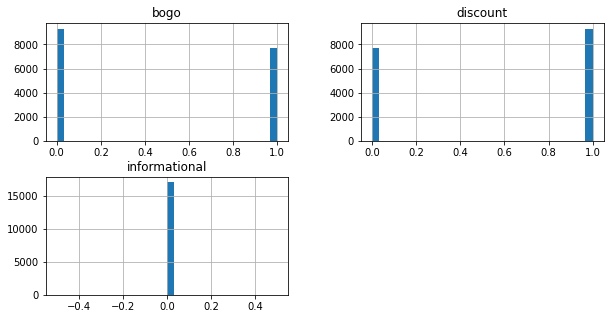

In [ ]:
print("Histogram of male customer's completed offer types ")
(my_starbuck[(my_starbuck['Male']==1) & (my_starbuck['reward']==1) ][['bogo',	'discount',	'informational']]).hist(bins=30, figsize=(10, 5))

In [ ]:
my_starbuck

,person,time,cumulative_transaction,reward,offers,offer_completed,offer_received,offer_viewed,transaction,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,0009655768c64bdeb2e877511632db8f,7.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
1,0009655768c64bdeb2e877511632db8f,8.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
2,0009655768c64bdeb2e877511632db8f,14.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,1,0,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
3,0009655768c64bdeb2e877511632db8f,16.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
4,0009655768c64bdeb2e877511632db8f,17.0,22.16,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,0,33,72000.0,70,1,0,0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,ffff82501cea40309d5fdd7edcca4a07,21.0,182.81,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167577,ffff82501cea40309d5fdd7edcca4a07,23.0,182.81,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167578,ffff82501cea40309d5fdd7edcca4a07,24.0,182.81,0,2906b810c7d4411798c6938adc9daaa5,0,1,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
167579,ffff82501cea40309d5fdd7edcca4a07,24.0,197.04,1,2906b810c7d4411798c6938adc9daaa5,1,0,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07


In [ ]:
#person_received_offers = my_starbuck[my_starbuck['event']=='offer received'].groupby('person').size()
#print(f"{sum(person_received_offers.values)} is number of received offers")
#person_received_offers

In [ ]:
#person_received_offers_df = pd.DataFrame({'person_id':person_received_offers.index, 'received_offers':person_received_offers.values})

In [ ]:
#person_viewed_offers = my_starbuck[my_starbuck['event']=='offer viewed'].groupby('person').size()
#print(f"{sum(person_viewed_offers.values)} is number of viewed offers")
#person_viewed_offers

In [ ]:
#person_viewed_offers_df = pd.DataFrame({'person_id':person_viewed_offers.index, 'viewed_offers':person_viewed_offers.values})

In [ ]:
#person_completed_offers = my_starbuck[my_starbuck['event']=='offer completed'].groupby('person').size()
#print(f"{sum(person_completed_offers.values)} is number of completed offers")
#person_completed_offers

In [ ]:
#person_completed_offers_df = pd.DataFrame({'person_id':person_completed_offers.index, 'completed_offers':person_completed_offers.values})


In [ ]:
#my_profile = pd.read_csv("profile_edited.csv")
#my_profile

In [ ]:
#profile_received_offers = pd.merge(my_profile, person_received_offers_df, left_on='id', right_on='person_id', how='left').drop('person_id', axis=1)
#profile_received_offers = profile_received_offers.fillna(int(0))
#profile_received_offers

In [ ]:
#profile_viewed_offers = pd.merge(profile_received_offers, person_viewed_offers_df, left_on='id', right_on='person_id', how='left').drop('person_id', axis=1)
#profile_viewed_offers = profile_viewed_offers.fillna(int(0))
#profile_viewed_offers

In [ ]:
#profile_completed_offers = pd.merge(profile_viewed_offers, person_completed_offers_df, left_on='id', right_on='person_id', how='left').drop('person_id', axis=1)
#profile_completed_offers = profile_completed_offers.fillna(int(0))
#profile_completed_offers

In [ ]:
#profile_completed_offers['done_offers_ratio'] = (profile_completed_offers['completed_offers']/profile_completed_offers['received_offers']).round(3)
#profile_completed_offers

In [ ]:
#print people who does not have received any offers
#profile_completed_offers[profile_completed_offers['received_offers']==0]

In [ ]:
#profile_final = pd.merge(profile_completed_offers, person_transactions_df, left_on='id', right_on='person_id', how='left').drop('person_id', axis=1)
#profile_final = profile_final.fillna(int(0))
#profile_final

In [ ]:
#print to see transactions of people who does not have received any offers 
#profile_final[profile_final['received_offers']==0]

In [ ]:
#profile_final.info()

In [ ]:
#profile_final.to_csv("profile_final.csv", index=False)

# **Deploy**

In [ ]:
my_starbuck = pd.read_csv("my_starbuck.csv")
my_starbuck

,person,time,cumulative_transaction,reward,offers,offer_completed,offer_received,offer_viewed,age,income,membership_duration,Male,Female,Other,offer_reward,offer_difficulty,offer_duration,web,email,mobile,social,bogo,discount,informational,total_transaction
0,0009655768c64bdeb2e877511632db8f,7.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
1,0009655768c64bdeb2e877511632db8f,8.0,0.00,0,5a8bc65990b245e5a138643cd4eb9837,0,0,1,33,72000.0,70,1,0,0,0.0,0.0,3.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,127.60
2,0009655768c64bdeb2e877511632db8f,14.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,1,0,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
3,0009655768c64bdeb2e877511632db8f,16.0,22.16,0,3f207df678b143eea3cee63160fa8bed,0,0,1,33,72000.0,70,1,0,0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,127.60
4,0009655768c64bdeb2e877511632db8f,17.0,22.16,0,f19421c1d4aa40978ebb69ca19b0e20d,0,1,0,33,72000.0,70,1,0,0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,127.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,ffff82501cea40309d5fdd7edcca4a07,21.0,182.81,1,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167577,ffff82501cea40309d5fdd7edcca4a07,23.0,182.81,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0,1,45,62000.0,75,0,1,0,5.0,5.0,7.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,226.07
167578,ffff82501cea40309d5fdd7edcca4a07,24.0,182.81,0,2906b810c7d4411798c6938adc9daaa5,0,1,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07
167579,ffff82501cea40309d5fdd7edcca4a07,24.0,197.04,1,2906b810c7d4411798c6938adc9daaa5,1,0,0,45,62000.0,75,0,1,0,2.0,10.0,7.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,226.07


In [ ]:
my_starbuck['offers'].astype('category')
my_starbuck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167581 entries, 0 to 167580
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   person                  167581 non-null  object 
 1   time                    167581 non-null  float64
 2   cumulative_transaction  167581 non-null  float64
 3   reward                  167581 non-null  int64  
 4   offers                  167581 non-null  object 
 5   offer_completed         167581 non-null  int64  
 6   offer_received          167581 non-null  int64  
 7   offer_viewed            167581 non-null  int64  
 8   age                     167581 non-null  int64  
 9   income                  167581 non-null  float64
 10  membership_duration     167581 non-null  int64  
 11  Male                    167581 non-null  int64  
 12  Female                  167581 non-null  int64  
 13  Other                   167581 non-null  int64  
 14  offer_reward        

In [ ]:
#from sklearn import preprocessing

#x = my_starbuck[['income']].values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#normalized_columns = pd.DataFrame(x_scaled)
#normalized_columns
#data = my_starbuck.copy()
#data['income'] = normalized_columns[0]

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    my_starbuck, test_size=0.25, random_state=42
)


In [ ]:
print(train.shape, test.shape)

(125685, 25) (41896, 25)


In [ ]:
from autogluon.tabular import TabularPredictor

save_path = 'transaction_models'
predictor = TabularPredictor('cumulative_transaction', problem_type='regression', 
                                          path=save_path, learner_kwargs={'ignored_columns':['person', 'offers','Other', 'email', 'informational', 'offer_completed', 'offer_received', 'offer_viewed', 'total_transaction']} ).fit(train, time_limit=600, presets='best_quality')

Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "transaction_models/"
AutoGluon Version:  0.3.1
Train Data Rows:    125685
Train Data Columns: 24
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['person', 'offers', 'Other', 'email', 'informational', 'offer_completed', 'offer_received', 'offer_viewed', 'total_transaction']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11652.49 MB
	Train Data (Original)  Memory Usage: 15.08 MB (0.1% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 8 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting Ident

[1000]	train_set's rmse: 67.4168	valid_set's rmse: 72.2466
[2000]	train_set's rmse: 64.3231	valid_set's rmse: 71.0113
[3000]	train_set's rmse: 62.0346	valid_set's rmse: 70.0332
[4000]	train_set's rmse: 60.2209	valid_set's rmse: 69.2738


	Ran out of time, early stopping on iteration 4270. Best iteration is:
	[4270]	train_set's rmse: 59.7645	valid_set's rmse: 69.082
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.4368	valid_set's rmse: 71.2866
[2000]	train_set's rmse: 64.4388	valid_set's rmse: 69.6763
[3000]	train_set's rmse: 62.2234	valid_set's rmse: 68.6162
[4000]	train_set's rmse: 60.3866	valid_set's rmse: 67.8064


	Ran out of time, early stopping on iteration 4464. Best iteration is:
	[4464]	train_set's rmse: 59.6152	valid_set's rmse: 67.4536
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.5554	valid_set's rmse: 71.0791
[2000]	train_set's rmse: 64.4205	valid_set's rmse: 69.9578
[3000]	train_set's rmse: 62.1144	valid_set's rmse: 69.2414
[4000]	train_set's rmse: 60.3051	valid_set's rmse: 68.698


	Ran out of time, early stopping on iteration 4610. Best iteration is:
	[4600]	train_set's rmse: 59.353	valid_set's rmse: 68.3946
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.6957	valid_set's rmse: 69.0962
[2000]	train_set's rmse: 64.6479	valid_set's rmse: 67.773
[3000]	train_set's rmse: 62.4163	valid_set's rmse: 66.8988
[4000]	train_set's rmse: 60.6536	valid_set's rmse: 66.167


	Ran out of time, early stopping on iteration 4319. Best iteration is:
	[4310]	train_set's rmse: 60.1386	valid_set's rmse: 65.9778
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.4969	valid_set's rmse: 71.172
[2000]	train_set's rmse: 64.2961	valid_set's rmse: 70.1365
[3000]	train_set's rmse: 62.0734	valid_set's rmse: 69.4543
[4000]	train_set's rmse: 60.2473	valid_set's rmse: 68.8828


	Ran out of time, early stopping on iteration 4672. Best iteration is:
	[4670]	train_set's rmse: 59.1599	valid_set's rmse: 68.5166
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.2684	valid_set's rmse: 71.6194
[2000]	train_set's rmse: 64.2804	valid_set's rmse: 70.3954
[3000]	train_set's rmse: 62.007	valid_set's rmse: 69.5219
[4000]	train_set's rmse: 60.1868	valid_set's rmse: 68.9496


	Ran out of time, early stopping on iteration 4749. Best iteration is:
	[4744]	train_set's rmse: 59.0229	valid_set's rmse: 68.5561
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.8512	valid_set's rmse: 68.5062
[2000]	train_set's rmse: 64.7443	valid_set's rmse: 67.4548
[3000]	train_set's rmse: 62.4751	valid_set's rmse: 66.6781
[4000]	train_set's rmse: 60.6589	valid_set's rmse: 66.1123


	Ran out of time, early stopping on iteration 4804. Best iteration is:
	[4804]	train_set's rmse: 59.3802	valid_set's rmse: 65.7313
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.5817	valid_set's rmse: 72.0729
[2000]	train_set's rmse: 64.4797	valid_set's rmse: 70.7491
[3000]	train_set's rmse: 62.187	valid_set's rmse: 69.7829
[4000]	train_set's rmse: 60.3857	valid_set's rmse: 69.0839


	Ran out of time, early stopping on iteration 4883. Best iteration is:
	[4870]	train_set's rmse: 58.9836	valid_set's rmse: 68.5107
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.5697	valid_set's rmse: 68.8593
[2000]	train_set's rmse: 64.5793	valid_set's rmse: 67.7369
[3000]	train_set's rmse: 62.2954	valid_set's rmse: 66.7837
[4000]	train_set's rmse: 60.5003	valid_set's rmse: 66.1713
[5000]	train_set's rmse: 58.9669	valid_set's rmse: 65.5893


	Ran out of time, early stopping on iteration 5044. Best iteration is:
	[5044]	train_set's rmse: 58.9036	valid_set's rmse: 65.5632
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 67.3863	valid_set's rmse: 71.1078
[2000]	train_set's rmse: 64.4382	valid_set's rmse: 69.9326
[3000]	train_set's rmse: 62.2008	valid_set's rmse: 69.064
[4000]	train_set's rmse: 60.4281	valid_set's rmse: 68.378
[5000]	train_set's rmse: 58.8667	valid_set's rmse: 67.8588


	Ran out of time, early stopping on iteration 5392. Best iteration is:
	[5389]	train_set's rmse: 58.3047	valid_set's rmse: 67.6579
	-67.556	 = Validation score   (root_mean_squared_error)
	334.66s	 = Training   runtime
	30.28s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 1.32s of the 201.24s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	train_set's rmse: 85.3072	valid_set's rmse: 87.2069
	Time limit exceeded... Skipping LightGBM_BAG_L1.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 199.65s of re

[1000]	train_set's rmse: 45.3853	valid_set's rmse: 52.1751
[2000]	train_set's rmse: 41.7608	valid_set's rmse: 51.7892


	Ran out of time, early stopping on iteration 2042. Best iteration is:
	[2018]	train_set's rmse: 41.7056	valid_set's rmse: 51.7715
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.269	valid_set's rmse: 53.0376
[2000]	train_set's rmse: 41.6173	valid_set's rmse: 52.4693


	Ran out of time, early stopping on iteration 2102. Best iteration is:
	[2097]	train_set's rmse: 41.3509	valid_set's rmse: 52.4372
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.2414	valid_set's rmse: 52.2972
[2000]	train_set's rmse: 41.5924	valid_set's rmse: 51.7833


	Ran out of time, early stopping on iteration 2129. Best iteration is:
	[2108]	train_set's rmse: 41.2957	valid_set's rmse: 51.7084
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.4764	valid_set's rmse: 52.3471
[2000]	train_set's rmse: 41.8353	valid_set's rmse: 51.9854


	Ran out of time, early stopping on iteration 2139. Best iteration is:
	[2100]	train_set's rmse: 41.5561	valid_set's rmse: 51.9245
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.5282	valid_set's rmse: 49.9049


	Ran out of time, early stopping on iteration 1856. Best iteration is:
	[1856]	train_set's rmse: 42.3776	valid_set's rmse: 49.5357
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.1767	valid_set's rmse: 53.4663
[2000]	train_set's rmse: 41.6349	valid_set's rmse: 52.9533


	Ran out of time, early stopping on iteration 2172. Best iteration is:
	[2170]	train_set's rmse: 41.1463	valid_set's rmse: 52.8912
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.2426	valid_set's rmse: 53.2279
[2000]	train_set's rmse: 41.5991	valid_set's rmse: 52.3874


	Ran out of time, early stopping on iteration 2254. Best iteration is:
	[2253]	train_set's rmse: 40.9485	valid_set's rmse: 52.2138
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 44.9328	valid_set's rmse: 54.2942
[2000]	train_set's rmse: 41.2759	valid_set's rmse: 54.1679


	Ran out of time, early stopping on iteration 2263. Best iteration is:
	[2173]	train_set's rmse: 40.8059	valid_set's rmse: 54.0961
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.7659	valid_set's rmse: 49.482
[2000]	train_set's rmse: 42.0646	valid_set's rmse: 48.5645


	Ran out of time, early stopping on iteration 2306. Best iteration is:
	[2299]	train_set's rmse: 41.2529	valid_set's rmse: 48.4294
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 45.3725	valid_set's rmse: 50.0144


	-51.5105	 = Validation score   (root_mean_squared_error)
	166.55s	 = Training   runtime
	12.42s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 6.04s of the 6.01s of remaining time.
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	train_set's rmse: 63.0846	valid_set's rmse: 63.4784
	Time limit exceeded... Skipping LightGBM_BAG_L2.
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 4.55s of the 4.52s of remaining time.
	Time limit exceeded... Skipping RandomForestMSE_BAG_L2.
Fitting model: CatBoost_BAG_L2 ... Training model for up to 0.11s of the 0.08s of remaining time.
	Ti

In [ ]:
predictor = TabularPredictor.load('./transaction_models')  # how to load previously-trained predictor from file
predictor.fit_summary(show_plot=True)

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L2 -51.510458      49.273723  503.450401               12.418053         166.553533            2       True          5
1    WeightedEnsemble_L3 -51.510458      49.276742  503.456814                0.003019           0.006413            3       True          6
2    WeightedEnsemble_L2 -52.775780      33.623753  336.982803                0.003025           1.197187            2       True          4
3  KNeighborsDist_BAG_L1 -53.779447       3.345324    1.128392                3.345324           1.128392            1       True          2
4  KNeighborsUnif_BAG_L1 -66.348922       3.234942    1.111252                3.234942           1.111252            1       True          1
5      LightGBMXT_BAG_L1 -67.556002      30.275405  334.657224               30.275405      

{'leaderboard':                    model  score_val  ...  can_infer  fit_order
 0      LightGBMXT_BAG_L2 -51.510458  ...       True          5
 1    WeightedEnsemble_L3 -51.510458  ...       True          6
 2    WeightedEnsemble_L2 -52.775780  ...       True          4
 3  KNeighborsDist_BAG_L1 -53.779447  ...       True          2
 4  KNeighborsUnif_BAG_L1 -66.348922  ...       True          1
 5      LightGBMXT_BAG_L1 -67.556002  ...       True          3
 
 [6 rows x 9 columns],
 'max_stack_level': 3,
 'model_best': 'WeightedEnsemble_L3',
 'model_fit_times': {'KNeighborsDist_BAG_L1': 1.1283915042877197,
  'KNeighborsUnif_BAG_L1': 1.1112523078918457,
  'LightGBMXT_BAG_L1': 334.65722370147705,
  'LightGBMXT_BAG_L2': 166.55353307724,
  'WeightedEnsemble_L2': 1.1971874237060547,
  'WeightedEnsemble_L3': 0.006412982940673828},
 'model_hyperparams': {'KNeighborsDist_BAG_L1': {'max_base_models': 25,
   'max_base_models_per_type': 5,
   'save_bag_folds': True,
   'use_child_oof': True,
   

In [ ]:
predictor.leaderboard()

                   model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L2 -51.510458      49.273723  503.450401               12.418053         166.553533            2       True          5
1    WeightedEnsemble_L3 -51.510458      49.276742  503.456814                0.003019           0.006413            3       True          6
2    WeightedEnsemble_L2 -52.775780      33.623753  336.982803                0.003025           1.197187            2       True          4
3  KNeighborsDist_BAG_L1 -53.779447       3.345324    1.128392                3.345324           1.128392            1       True          2
4  KNeighborsUnif_BAG_L1 -66.348922       3.234942    1.111252                3.234942           1.111252            1       True          1
5      LightGBMXT_BAG_L1 -67.556002      30.275405  334.657224               30.275405         334.657224            1       True          3


,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT_BAG_L2,-51.510458,49.273723,503.450401,12.418053,166.553533,2,True,5
1,WeightedEnsemble_L3,-51.510458,49.276742,503.456814,0.003019,0.006413,3,True,6
2,WeightedEnsemble_L2,-52.775780,33.623753,336.982803,0.003025,1.197187,2,True,4
3,KNeighborsDist_BAG_L1,-53.779447,3.345324,1.128392,3.345324,1.128392,1,True,2
4,KNeighborsUnif_BAG_L1,-66.348922,3.234942,1.111252,3.234942,1.111252,1,True,1
5,LightGBMXT_BAG_L1,-67.556002,30.275405,334.657224,30.275405,334.657224,1,True,3


In [ ]:
predict_ratio = predictor.predict(test)
predict_ratio

53680    695.370728
60296     40.743008
93002     21.695568
51223     16.072035
63364      0.376979
            ...    
38068     35.301281
96695     11.974313
51438     93.091560
85069    130.599136
88609     25.982086
Name: cumulative_transaction, Length: 41896, dtype: float32

In [ ]:
test['cumulative_transaction']

53680    674.56
60296      8.59
93002      8.48
51223     13.22
63364      0.00
          ...  
38068     34.04
96695      4.60
51438     44.72
85069     71.67
88609      9.95
Name: cumulative_transaction, Length: 41896, dtype: float64

In [ ]:
predictor.evaluate(test)

Evaluation: root_mean_squared_error on test data: -49.29348299987657
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -49.29348299987657,
    "mean_squared_error": -2429.8474662590943,
    "mean_absolute_error": -20.20478677404717,
    "r2": 0.6638518186505546,
    "pearsonr": 0.8147734157373892,
    "median_absolute_error": -8.496100425720215
}


{'mean_absolute_error': -20.20478677404717,
 'mean_squared_error': -2429.8474662590943,
 'median_absolute_error': -8.496100425720215,
 'pearsonr': 0.8147734157373892,
 'r2': 0.6638518186505546,
 'root_mean_squared_error': -49.29348299987657}

In [ ]:
predictor.feature_importance(test)

Computing feature importance via permutation shuffling for 15 features using 1000 rows with 3 shuffle sets...
	299.72s	= Expected runtime (99.91s per shuffle set)
	190.89s	= Actual runtime (Completed 3 of 3 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
income,39.300544,8.820469,0.008190,3,89.842809,-11.241720
membership_duration,31.978785,1.216638,0.000241,3,38.950256,25.007314
time,31.867890,4.791016,0.003725,3,59.320941,4.414839
age,23.805558,8.877443,0.021681,3,74.674288,-27.063172
offer_difficulty,8.444672,1.991857,0.009022,3,19.858232,-2.968889
offer_reward,5.770535,1.216925,0.007251,3,12.743650,-1.202580
offer_duration,4.341263,1.232860,0.012923,3,11.405687,-2.723161
Male,1.645003,2.229820,0.164795,3,14.422117,-11.132110
social,1.002721,0.693739,0.064659,3,4.977924,-2.972482
reward,0.814705,1.574009,0.232295,3,9.833949,-8.204539


In [ ]:
predictor.get_model_best()

'LightGBMXT_BAG_L2'